## Decision Tree Classifier

## Princess Owotade (pjo395)


I will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics I will use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class.

  
For this code implentation, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`

To test my tree built from the Decision Tree Classifier class, I will use some Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that I can use to describe and predict the housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [1]:
# import the libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # Yes, you get to use scikit-learn this assignment, but only when I say!
import graphviz

## Loading the Data
I will load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X` containing the features of the data set (everything but `Type`), and `s_y`, the series containing just the label column (just `Type`)

In [2]:
df_x = pd.read_csv('melb_tree_train.csv', usecols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea','YearBuilt','CouncilArea'])
s_y = pd.read_csv('melb_tree_train.csv', usecols = ['Type'])

## Defining the entropy function
I will implement a function `calc_entropy` that takes the labels series, s_y, as a parameter. 

In [3]:
def calc_entropy (s_y):
    
    t_value = 0
    u_value = 0
    h_value = 0
    
    for i in range(len(s_y)):
        if s_y.iloc[i].any() == 't':
            t_value+=1
        elif s_y.iloc[i].any() == 'u':
            u_value+=1
        else:
            h_value+=1
            
    total = t_value + u_value + h_value
    
    entropy = ((-t_value/total)*log2(t_value/total)+(-u_value/total)*log2(u_value/total)+(-h_value/total)*log2(h_value/total))
    return entropy

    

## I will use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [4]:
calc_entropy(s_y)

1.5825333114261775

In [5]:
calc_entropy(s_y[df_x['Landsize'] <= 200])

1.3456432116206725

In [6]:
calc_entropy(s_y[df_x['Landsize'].between(201, 450, inclusive = True)])

1.4660501816027978

In [7]:
calc_entropy(s_y[df_x['Landsize'] > 450])

1.09954792005911

## Defining the Gini Index
Implement the function `calc_gini` that takes the labels series, s_y, as a parameter. Implement using the definition on p128 in the DM book.  Use only pandas library

In [8]:
def calc_gini(s_y):
    
    t_value = 0
    u_value = 0
    h_value = 0
    
    for i in range(len(s_y)):
        if s_y.iloc[i].any() == 't':
            t_value+=1
        elif s_y.iloc[i].any() == 'u':
            u_value+=1
        else:
            h_value+=1
            
    total = t_value + u_value + h_value
    
    gini = 1 - (((t_value/total)**2) + ((u_value/total)**2) + ((h_value/total)**2))
    
    return gini

## I will use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [9]:
calc_gini(s_y)

0.6655601280292638

In [10]:
calc_gini(s_y[df_x['Landsize'] <= 200])

0.5741211482422965

In [11]:
calc_gini(s_y[df_x['Landsize'].between(201, 450, inclusive = True)])

0.6101021682602731

In [12]:
calc_gini(s_y[df_x['Landsize'] > 450])

0.43819341715976323

## Creating a decision tree 
I will use [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3

In [13]:
one_hot = pd.get_dummies(df_x.CouncilArea, prefix = 'Area')
df_x = pd.concat([df_x, one_hot], axis = 1)
df_x = df_x.drop('CouncilArea', axis = 1)

In [14]:
y = np.array(s_y)
x = np.array(df_x.iloc[:,:])

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



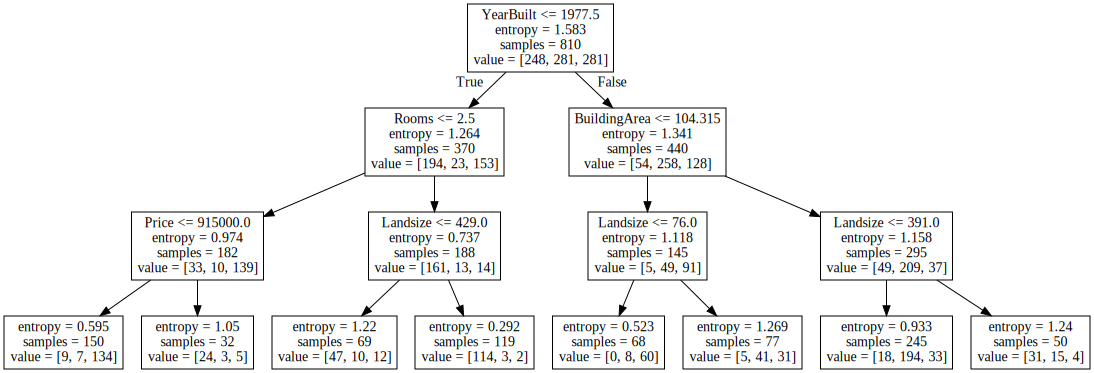

In [15]:
from sklearn.tree import export_text
features = list(df_x.columns)
cl = list(s_y.columns)
d_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
d_tree = d_tree.fit(x,y)
d_data = tree.export_graphviz(d_tree, out_file = None, feature_names = features)
r = export_text(d_tree, feature_names = features )
print(r)
graph = graphviz.Source(d_data)
graph

## Calculating the Accuracy and Display Learning Curve
The test data will now be used.

I will use the scikit-learn library to create decision trees with the following configurations

    - Vary the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Vary the max depth from 2 to 15 with the Entropy as the impurity measure


Evaluate the accuracy of each decision tree with both the 
  - Training set
  - Test set

I will display the results graphicaly, and offer an analysis of the trend. The max depth will be on the x-axis, and the error rate will be on the y-axis.

In [16]:

df_t = pd.read_csv('melb_tree_test.csv', usecols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea','YearBuilt','CouncilArea'])

s_t = pd.read_csv('melb_tree_test.csv', usecols = ['Type'])

t_one_hot = pd.get_dummies(df_t.CouncilArea, prefix = 'Area')

df_t = pd.concat([df_t, t_one_hot], axis = 1)
df_t = df_t.drop('CouncilArea', axis = 1)

In [17]:
train_features = df_x.iloc[:,:]
train_targets = s_y
test_features = df_t.iloc[:,:]
test_targets = s_t

max_depth_range = list(range(2,16))

#lists that will hold errors for training data(gini, entropy) and test data(gini, entropy)
err_train_g = [] 
err_train_e = [] 
err_test_g = [] 
err_test_e = [] 

 

for depth in max_depth_range:
    
    train_predictions = 0
    test_predictions = 0
    
    #lists that will hold correct predictions for training data(gini, entropy) and test data(gini, entropy)
    tacc_g = [] 
    tacc_e = [] 
    sacc_g = [] 
    sacc_e = [] 

    tree_g = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = depth).fit(x,y)
    tree_e = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth).fit(x,y)
    
    y_train_g = tree_g.predict(train_features)
    y_train_e = tree_e.predict(train_features)
    y_test_g = tree_g.predict(test_features)
    y_test_e = tree_e.predict(test_features)
    
    for i in range(len(train_targets)):
        train_predictions += 1
        if y_train_g[i] == train_targets.iloc[i].any():
            tacc_g.append(1)
        if y_train_e[i] == train_targets.iloc[i].any():
            tacc_e.append(1)

    for j in range(len(test_targets)):
        test_predictions += 1
        if y_test_g[j] == test_targets.iloc[j].any():
            sacc_g.append(1)
        if y_test_e[j] == test_targets.iloc[j].any():
            sacc_e.append(1)

    tg_acc = len(tacc_g)/train_predictions
    te_acc = len(tacc_e)/train_predictions
    sg_acc = len(sacc_g)/test_predictions
    se_acc = len(sacc_e)/test_predictions

    #calculating error
    err_train_e.append(1 - te_acc)
    err_test_e.append(1 - se_acc)
    err_train_g.append(1 - tg_acc)
    err_test_g.append(1 - sg_acc)




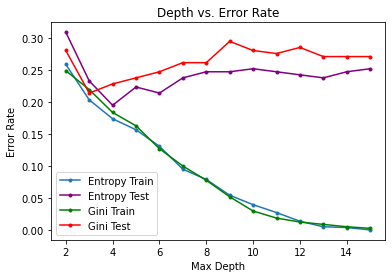

In [18]:
plt.plot(max_depth_range, err_train_e, label = 'Entropy Train', marker = '.')

plt.plot(max_depth_range, err_test_e, label = 'Entropy Test', color = 'purple', marker = '.')

plt.plot(max_depth_range, err_train_g, label = 'Gini Train', color = 'green', marker = '.')

plt.plot(max_depth_range, err_test_g, label = 'Gini Test', color = 'red', marker = '.')

plt.ylabel('Error Rate')
plt.xlabel('Max Depth')
plt.title('Depth vs. Error Rate')
plt.legend()
plt.show()